In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_15000.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_50000.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_5000.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC                         
from sklearn.naive_bayes import GaussianNB         
from sklearn.tree import DecisionTreeClassifier                           
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import random


In [3]:
df = pd.read_csv("/kaggle/input/aids-virus-infection-prediction/AIDS_Classification.csv")
df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,1091,3,21,53.2980,1,0,0,100,0,1,...,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,...,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,...,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,...,0,1,0,0,0,166,169,999,1838,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [5]:
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


In [6]:
print("Shape of the dataset {}".format(df.shape))

Shape of the dataset (2139, 23)


In [7]:
#See for any missing values in the dataset
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total= df.isnull().sum().sort_values(ascending=False) #sorting the data
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percentage
time,0,0.0
gender,0,0.0
cd820,0,0.0
cd80,0,0.0
cd420,0,0.0
cd40,0,0.0
offtrt,0,0.0
treat,0,0.0
symptom,0,0.0
strat,0,0.0


In [8]:
#Creating X and y data
X = df.drop(columns = 'infected') 
y = df['infected'] #Target value

scaler = StandardScaler()
X = scaler.fit_transform(X)

#Splitting the Data using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
Kneigh = KNeighborsClassifier(n_neighbors=3)
Kneigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
y_pred_neigh = Kneigh.predict(X_train)

In [11]:
kaccuracy = accuracy_score(y_train, y_pred_neigh)

In [12]:
# model
rfc = RandomForestClassifier(n_estimators=300)
model = rfc.fit(X_train,y_train)

In [13]:
# accuarcy
y_pred = model.predict(X_test)
accuarcy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuarcy)

Accuracy: 0.883177570093458


In [14]:
def calaculate_accuracy(x):
    x = df[x]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30)
    model = raf()
    model.fit(x_train, y_train)
    acc= model.score(x_test, y_test)
    print("acc = ",acc)
    return acc

In [15]:
# classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       486
           1       0.86      0.62      0.72       156

    accuracy                           0.88       642
   macro avg       0.87      0.79      0.82       642
weighted avg       0.88      0.88      0.88       642



<Axes: >

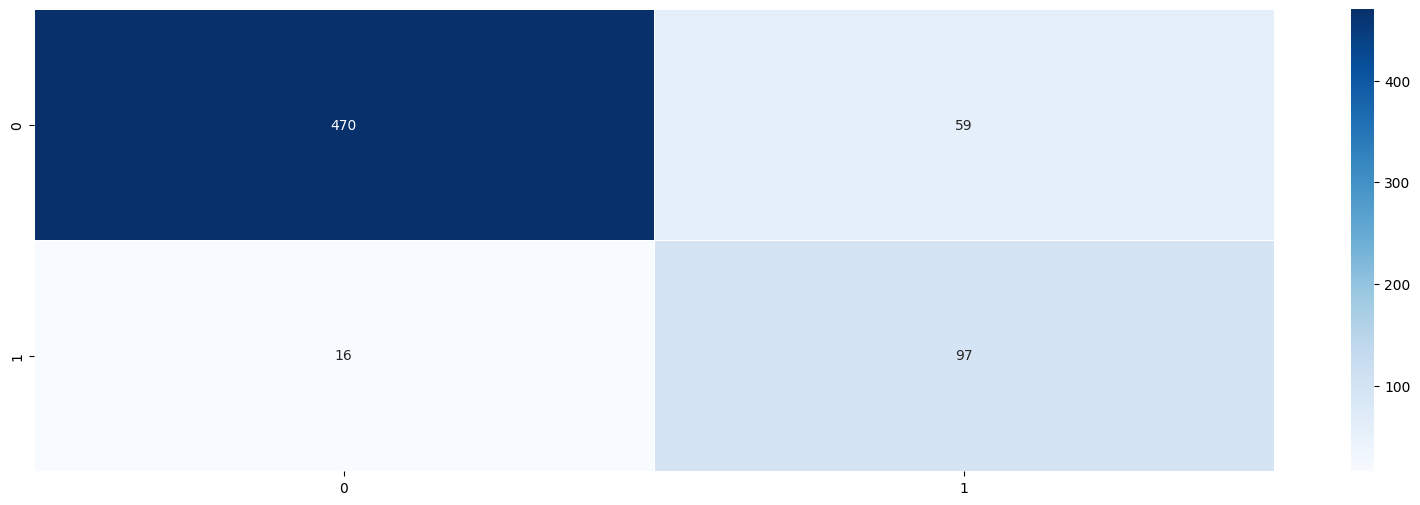

In [16]:
# confusion matrix heatmap
plt.subplots(figsize=(20, 6))

sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt="d", cmap="Blues", linewidths=.5)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('X_train shape is ' , y_train.shape)
print('X_test shape is ' , y_test.shape)

X_train shape is  (1604, 22)
X_test shape is  (535, 22)
X_train shape is  (1604,)
X_test shape is  (535,)


In [18]:
X.shape

(2139, 22)

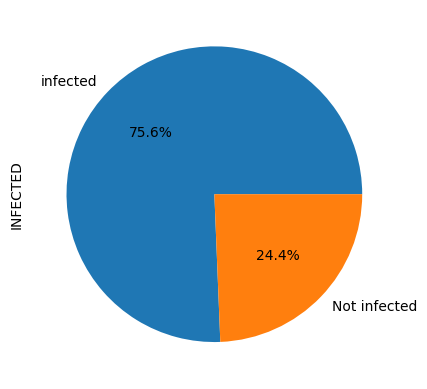

In [19]:
df.infected.value_counts().plot(kind="pie",labels=["infected","Not infected"],autopct="%.1f%%")
plt.ylabel("INFECTED");

In [20]:
columnsName=df.drop(labels= 'infected', axis= 1).columns.values.tolist()

In [21]:
print(columnsName)

['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820']


In [22]:
#y

In [23]:
columnsName1=[0,1]
chromosomes=[]
for i in range(10):
    chro1=[]
    for i in range(22):
        item = random.choice(tuple(columnsName1))
        chro1.append(item)
    chromosomes.append(chro1)

In [24]:
def data(chromosomes1):
    chromosomes2=[]
    for i in range(len(chromosomes1)):
        if chromosomes1[i]==1:
            chromosomes2.append(columnsName[i])
    return chromosomes2

In [25]:
from sklearn.ensemble import RandomForestClassifier as raf

model = raf()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
pb=[]
def checkpersonalnest():
        for i in range(len(chromosomes)):
            pb.append(calaculate_accuracy(data(chromosomes[i])))
checkpersonalnest()

acc =  0.7757009345794392
acc =  0.6993769470404985
acc =  0.7663551401869159
acc =  0.8894080996884736
acc =  0.7928348909657321
acc =  0.8566978193146417
acc =  0.7663551401869159
acc =  0.7445482866043613
acc =  0.7274143302180686
acc =  0.7694704049844237


In [27]:
def checkvelocity(globalbest):
    velocity=[]
    for j in range(len(chromosomes)):
        velocity.append(list(0+1*(np.random.random(1)[0])*(np.array(chromosomes[j]-np.array(chromosomes[j]))+1*(np.random.random(1)[0])*(np.array(globalbest)-np.array(chromosomes[j])))))
        #print (velocity)
        return velocity

In [28]:
def addingchromosomes(velocity):
    chromosomes2=[]
    for i in range (len(velocity)):
        nextchromo=[]
        for j in range (len(velocity[i])):
            nextchromo.append(chromosomes[i][j]+velocity[i][j])
            chromosomes.append(nextchromo)
            return chromosomes2

In [29]:
def normalize(chromosomes2):
    for l in range(len(chromosomes2)):
        for m in range(len(chromosomes2[l])):
            if chromosomes2[l][m]>0.5:
                chromosomes2[l][m]=1
            else:
                chromosomes2[l][m]=0
    return chromosomes2

In [30]:
def checkpd(chromosomes2):
    personal=[]
    for i in range(len(chromosomes2)):
        personal.append(calaculate_accuracy(data(chromosomes2[i])))
        for j in range(len(personal)):
            if(personal[j]>pb[j]):
                chromosomes[j]=chromosomes2[j]
                pb[j]=personal[j]
                return personal

In [31]:
max(pb)
ind = pb.index(max(pb))
globalbest=chromosomes[ind]
for i in range(20):
    chromosomes2=[]
    personal=[]
    velocity=checkvelocity(globalbest)
    chromosomes2=addingchromosomes(velocity)
    chromosomes2=normalize(chromosomes2)
    personal=checkpd(chromosomes2)
    globalbest=[]
    max(pb)
    ind = pb.index(max(pb))
    globalbest=chromosomes[ind]

In [32]:
print("max(pb):", max(pb))
print("ind:", ind)
print("globalbest:", globalbest)
# Add print statements within the loop to see intermediate values


max(pb): 0.8894080996884736
ind: 3
globalbest: [1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]


In [33]:
#max(pb)

In [34]:
#ind = pb.index(max(pb))
#print(ind)
#globalbest=chromosomes[ind]

In [35]:
X_selected=data(globalbest)
X_selected=df[X_selected]

In [36]:
X_selected

,time,age,wtkg,hemo,karnof,oprior,race,gender,strat,offtrt,cd420,cd80
0,948,48,89.8128,0,100,0,0,0,1,0,477,566
1,1002,61,49.4424,0,90,0,0,0,3,0,218,392
2,961,45,88.4520,0,90,0,0,1,3,1,274,2063
3,1166,47,85.2768,0,100,0,0,1,3,0,394,1590
4,1090,43,66.6792,0,100,0,0,1,3,0,353,870
...,...,...,...,...,...,...,...,...,...,...,...,...
2134,1091,21,53.2980,1,100,0,0,1,3,1,109,561
2135,395,17,102.9672,1,100,0,1,1,3,1,218,1759
2136,1104,53,69.8544,1,90,0,1,1,3,0,364,1391
2137,465,14,60.0000,1,100,0,0,1,1,0,169,999


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [38]:
# model
rfc = RandomForestClassifier(n_estimators=300)
model = rfc.fit(X_train,y_train)

In [39]:
# accuarcy
y_pred = model.predict(X_test)
accuarcy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuarcy)

Accuracy: 0.881619937694704


In [40]:
#Hyper
#Grid Search in hyberparameter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Initialize the SVM classifier
svm = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best estimator found
print("Best estimator:", grid_search.best_estimator_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator: SVC(C=100, gamma=0.01)
Accuracy on test set: 1.0


In [41]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002813,0.000312,0.001738,0.000367,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",1.000000,0.904762,0.904762,1.000000,0.904762,0.942857,0.046657,22
1,0.002253,0.000242,0.001349,0.000199,0.1,1,linear,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",1.000000,0.904762,0.904762,1.000000,0.904762,0.942857,0.046657,22
2,0.006729,0.004364,0.001730,0.000484,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.952381,0.904762,0.904762,0.952381,0.952381,0.933333,0.023328,34
3,0.003188,0.000702,0.001739,0.000279,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",1.000000,0.857143,0.809524,1.000000,0.857143,0.904762,0.079682,39
4,0.001988,0.000115,0.001367,0.000218,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",1.000000,0.904762,0.904762,1.000000,0.904762,0.942857,0.046657,22
5,0.006369,0.005264,0.001255,0.000046,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",1.000000,0.952381,0.904762,1.000000,0.952381,0.961905,0.035635,2
6,0.002410,0.000221,0.002392,0.001612,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.523810,0.619048,0.333333,0.333333,0.523810,0.466667,0.114286,42
7,0.001814,0.000214,0.001165,0.000033,0.1,0.01,linear,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}",1.000000,0.904762,0.904762,1.000000,0.904762,0.942857,0.046657,22
8,0.002162,0.000071,0.003325,0.004173,0.1,0.01,poly,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}",0.619048,0.380952,0.333333,0.333333,0.428571,0.419048,0.106053,43
9,0.003451,0.002636,0.001293,0.000201,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.333333,0.333333,0.333333,0.333333,0.523810,0.371429,0.076190,45


In [42]:
pd.DataFrame(grid_search.cv_results_)[['mean_test_score','std_test_score','params']]

,mean_test_score,std_test_score,params
0,0.942857,0.046657,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}"
1,0.942857,0.046657,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}"
2,0.933333,0.023328,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}"
3,0.904762,0.079682,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}"
4,0.942857,0.046657,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}"
5,0.961905,0.035635,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}"
6,0.466667,0.114286,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}"
7,0.942857,0.046657,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}"
8,0.419048,0.106053,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}"
9,0.371429,0.076190,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}"


In [43]:
accuracy = grid_search.best_score_

In [44]:
accuracy

0.9714285714285715

In [45]:
grid_search.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [46]:
classifier = SVC(C = 1 , kernel = 'linear' , gamma = 1)
classifier.fit(X_train , y_train)

SVC(C=1, gamma=1, kernel='linear')

In [47]:
#predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [48]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [49]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [50]:
accuracy

1.0